In [22]:
# import the necessary packages
from collections import deque
from imutils.video import VideoStream
from matplotlib import pyplot as plt
from skimage import morphology

import numpy as np
import argparse
import cv2
import imutils
import time

In [60]:
## Helper Functions for displaying image and scaling
def scale_img(img, scale_percent):
    #print("\nscale_img()")
    #print(img.shape)
    
    # Scaled Image Dimensions
    width  = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    
    # resize image
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #print(img.shape)
    return img

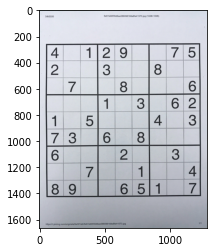

In [139]:
## Read in a File
frame = cv2.imread('sample3.jpg', cv2.IMREAD_COLOR) # Read the file
sf = 50/100
scaled = scale_img(frame, sf*100)
rgb = cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB)
plt.imshow(scaled)
plt.show()

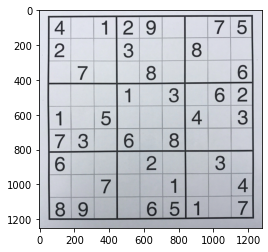

In [140]:
## Crop the image (1)
# crop_img = frame[y:y+h, x:x+w].copy()
crop_img = scaled[ int(sf*450):int(sf*2950), int(sf*5):int(sf*2900) ].copy()
plt.imshow(crop_img)
plt.show()

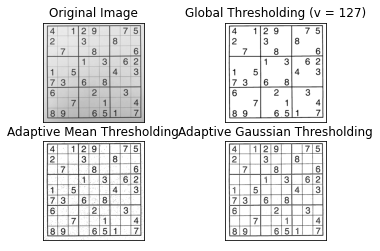

In [141]:
# Convert to Binary
# https://techtutorialsx.com/2019/04/13/python-opencv-converting-image-to-black-and-white/
gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
blurred = cv2.medianBlur(gray,5)

ret, th1 = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
         'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [gray, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()
#gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#(thresh, binary) = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY)
#edgeMap = imutils.auto_canny(gray)
#plt.imshow(binary, cmap='gray')
#plt.show()

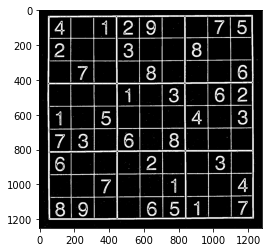

In [145]:
# Remove Noise
# https://scikit-image.org/docs/0.9.x/api/skimage.morphology.html#remove-small-objects
cleaned = morphology.remove_small_objects(th3, min_size=64, connectivity=1)
invert = (255-cleaned)

plt.imshow(invert,cmap='gray')
plt.show()

<class 'numpy.ndarray'>
49


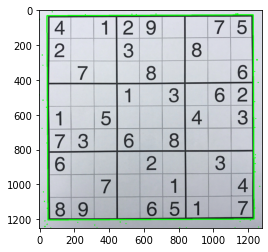

In [147]:
# find contours in the mask and draw largest enclosing rect
cnts = cv2.findContours(invert.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
center = None

print(type(cnts[0]))
print(len(cnts))
#for c in cnts:
if len(cnts) > 0:
    #index = cnts.index(max(cnts, key=cv2.contourArea))
    #print(index)
    #cnts.pop(index)
    c = max(cnts, key=cv2.contourArea)
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(crop_img, [box], 0,(0,255,0),5)

plt.imshow(crop_img)